In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
dataset=pd.read_csv("diabetes.xls")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
dataset.isnull().sum


<bound method DataFrame.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                   

In [63]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


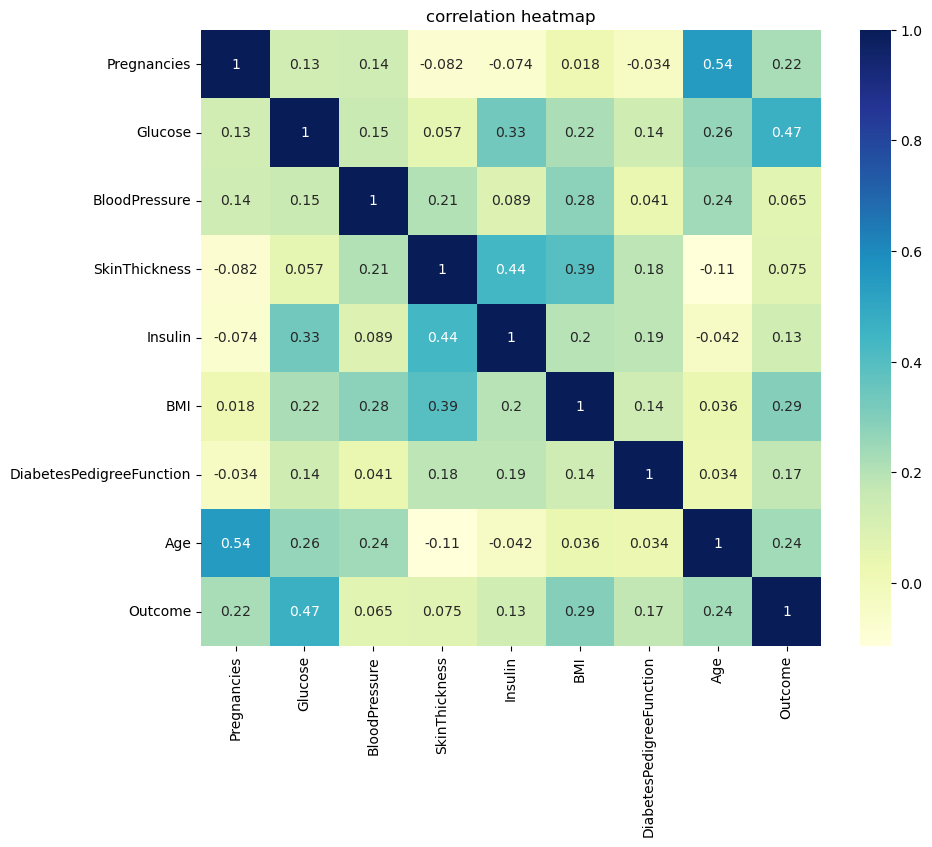

In [65]:
#correlation betwen features
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, fmt='.2g', cmap="YlGnBu")
plt.title("correlation heatmap")
plt.show()

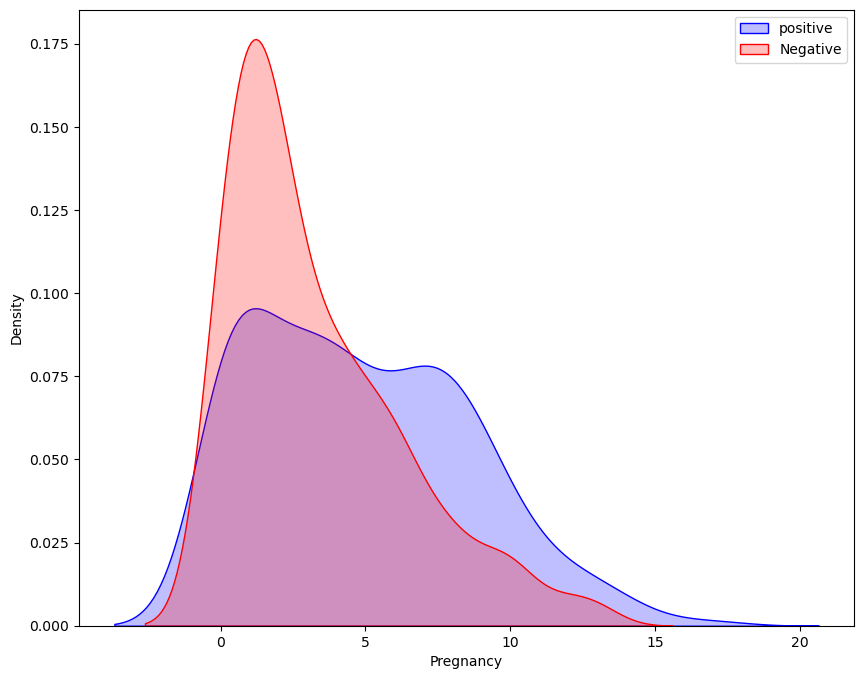

In [66]:
#Exploring pregnancy and target variables 
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1], color="blue",fill="True")
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0], color="red",fill="True")
kde.set_xlabel("Pregnancy")
kde.set_ylabel("Density")
kde.legend(["positive","Negative"])
plt.show()



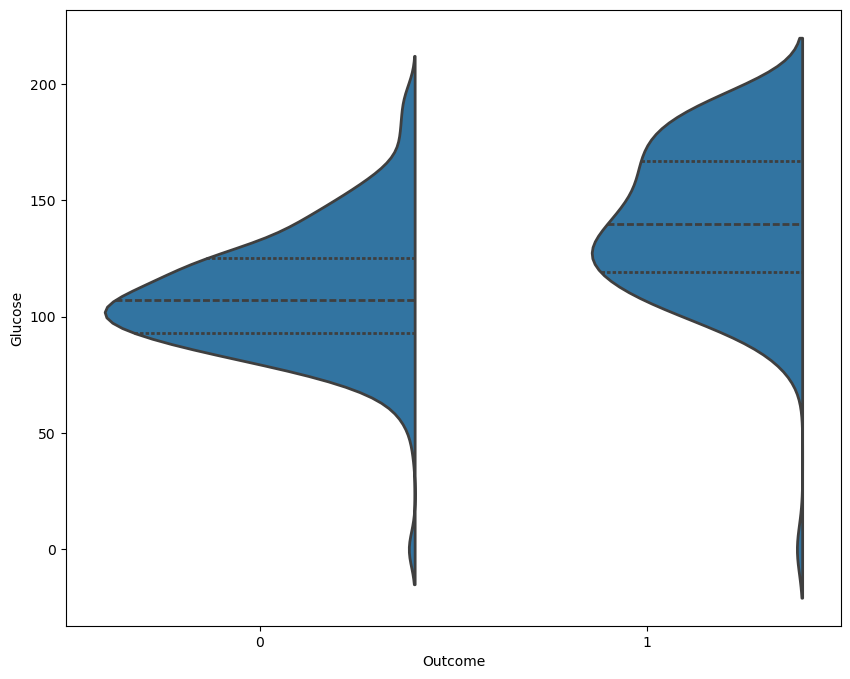

In [67]:
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset, x="Outcome", y="Glucose",split= True, inner='quart', linewidth=2)
plt.show()

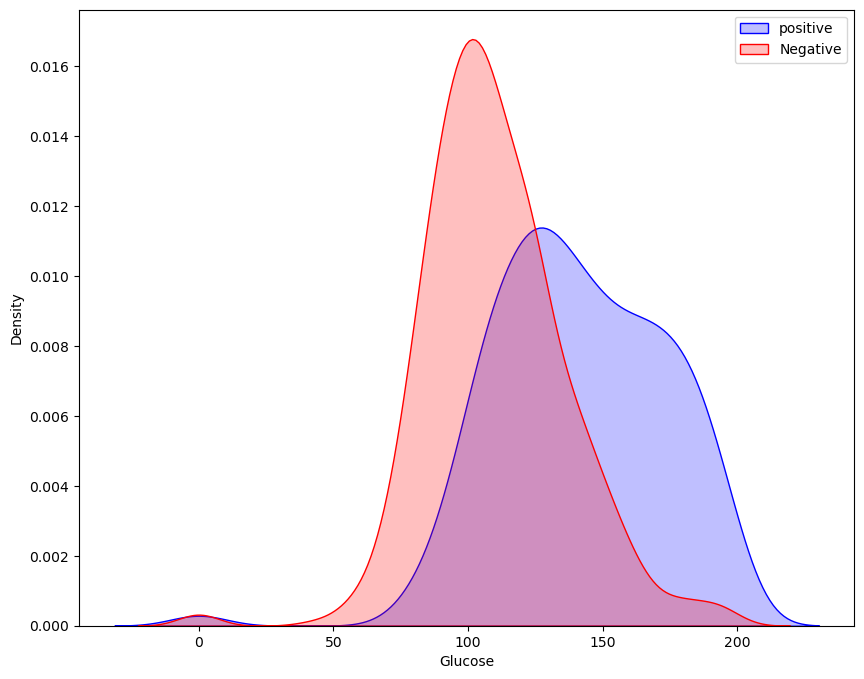

In [68]:
#Exploring pregnancy and target variables 
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1], color="blue",fill="True")
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0], color="red",fill="True")
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["positive","Negative"])
plt.show()



In [69]:
# replaces 0 with the mean/median of the respective feature
# glucose
dataset["Glucose"]=dataset["Glucose"].replace(0,dataset["Glucose"].median())
dataset["BloodPressure"]=dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
dataset["BMI"]=dataset["BMI"].replace(0,dataset["BMI"].mean())
dataset["SkinThickness	"]=dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())
dataset["Insulin"]=dataset["Insulin"].replace(0,dataset["Insulin"].mean())


In [70]:
dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness\t
0,6,148,72,35,79.799479,33.6,0.627,50,1,35.000000
1,1,85,66,29,79.799479,26.6,0.351,31,0,29.000000
2,8,183,64,0,79.799479,23.3,0.672,32,1,20.536458
3,1,89,66,23,94.000000,28.1,0.167,21,0,23.000000
4,0,137,40,35,168.000000,43.1,2.288,33,1,35.000000
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0,48.000000
764,2,122,70,27,79.799479,36.8,0.340,27,0,27.000000
765,5,121,72,23,112.000000,26.2,0.245,30,0,23.000000
766,1,126,60,0,79.799479,30.1,0.349,47,1,20.536458


In [71]:
#splitting the dependent and independent variable
x=dataset.drop(["Outcome"], axis = 1)
y=dataset["Outcome"]

In [72]:
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness\t
0,6,148,72,35,79.799479,33.6,0.627,50,35.000000
1,1,85,66,29,79.799479,26.6,0.351,31,29.000000
2,8,183,64,0,79.799479,23.3,0.672,32,20.536458
3,1,89,66,23,94.000000,28.1,0.167,21,23.000000
4,0,137,40,35,168.000000,43.1,2.288,33,35.000000
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,48.000000
764,2,122,70,27,79.799479,36.8,0.340,27,27.000000
765,5,121,72,23,112.000000,26.2,0.245,30,23.000000
766,1,126,60,0,79.799479,30.1,0.349,47,20.536458


In [73]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [74]:
# splitting  the dataset into training and testing dataset
from sklearn.model_selection import train_test_split


In [75]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

In [76]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness\t
464,10,115,98,0,79.799479,24.0,1.022,34,20.536458
223,7,142,60,33,190.000000,28.8,0.687,61,33.000000
393,4,116,72,12,87.000000,22.1,0.463,37,12.000000
766,1,126,60,0,79.799479,30.1,0.349,47,20.536458
570,3,78,70,0,79.799479,32.5,0.270,39,20.536458
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.000000,28.6,0.411,26,35.000000
106,1,96,122,0,79.799479,22.4,0.207,27,20.536458
270,10,101,86,37,79.799479,45.6,1.136,38,37.000000
435,0,141,72,0,79.799479,42.4,0.205,29,20.536458


In [77]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [94]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
    knn= KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_train,y_train))
    
    
    

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_24844\1639619141.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


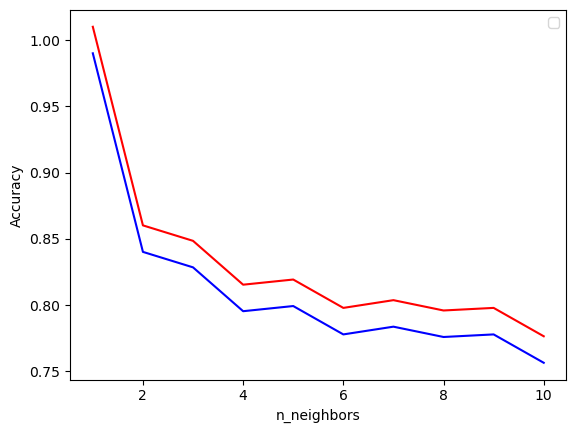

In [100]:
plt.plot(range(1, 11), [x + 0.01 for x in training_accuracy], color='red')
plt.plot(range(1, 11), [x - 0.01 for x in test_accuracy], color='blue')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# test_accuracy and training_accuracy are overlapping


In [97]:
print(training_accuracy,test_accuracy)

[1.0, 0.8501945525291829, 0.8385214007782101, 0.8054474708171206, 0.8093385214007782, 0.7879377431906615, 0.7937743190661478, 0.7859922178988327, 0.7879377431906615, 0.7665369649805448] [1.0, 0.8501945525291829, 0.8385214007782101, 0.8054474708171206, 0.8093385214007782, 0.7879377431906615, 0.7937743190661478, 0.7859922178988327, 0.7879377431906615, 0.7665369649805448]


In [103]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),":training accuracy")
print(knn.score(x_test,y_test),":test accuracy")
      

0.7879377431906615 :training accuracy
0.7283464566929134 :test accuracy


In [105]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),":training accuracy")
print(dt.score(x_test,y_test),":test accuracy")
      

1.0 :training accuracy
0.6968503937007874 :test accuracy


In [106]:
dt1 = DecisionTreeClassifier(random_state = 0,max_depth=4)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train),":training accuracy")
print(dt1.score(x_test,y_test),":test accuracy")

0.8171206225680934 :training accuracy
0.7204724409448819 :test accuracy


In [107]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state= 42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),": training accuracy")
print(mlp.score(x_test,y_test),":test accuracy")

0.7529182879377432 : training accuracy
0.7204724409448819 :test accuracy


In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [115]:

mlp1 = MLPClassifier(random_state= 0)
mlp1.fit(x_train_scaled,y_train)
print(mlp1.score(x_train_scaled,y_train),": training accuracy")
print(mlp1.score(x_test_scaled,y_test),":test accuracy")


0.8443579766536965 : training accuracy
0.7559055118110236 :test accuracy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>